In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

#import all the required libraries.  Must run this or functions will not work

In [5]:
df = pd.read_csv("C:/Users/Gary Chu/Desktop\Data Science\FuelConsumptionCo2.csv")
# download the data file from https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv


In [6]:
df.head()
# quick look at the first 5 row

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [7]:
df.describe()
# summerize the data

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [8]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
#create a data array called cdf form the df data file including engine size, cylinders, fuel comsumption, and co2 emission

cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


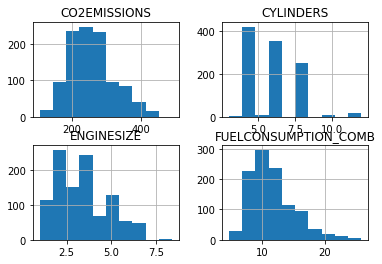

In [9]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()
# plot, alphabetical order of the colum name

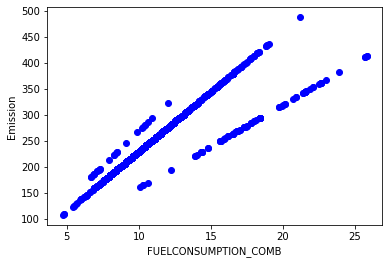

In [10]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()
# scatter graph to show relationship between fuel consumption and emission

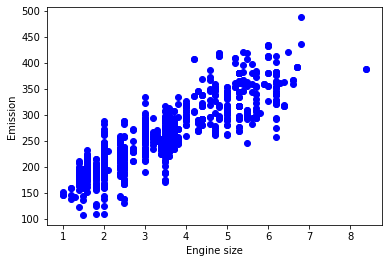

In [11]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()
# scratter graph using engine size


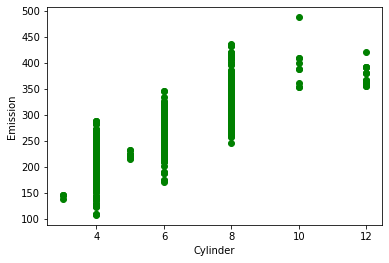

In [12]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='green')
plt.xlabel("Cylinder")
plt.ylabel("Emission")
plt.show()
# scratter graph using engine size

# Simple Regression Modeling

In [13]:
# len() returns length of the string
# split data set into train and test sets. 80% for training. 20% for testing
# ~ invert all bits (not function)
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]  # assign train to random 80% of test data
test = cdf[~msk]  # assign all data not in msk



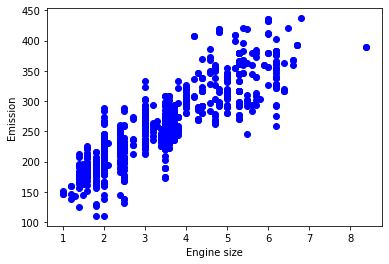

In [14]:
# train data distribution
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [15]:
#import the model
from sklearn import linear_model

# Train regression model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)

# Print the coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)


Coefficients:  [[38.9411031]]
Intercept:  [125.90352814]


Text(0, 0.5, 'Emission')

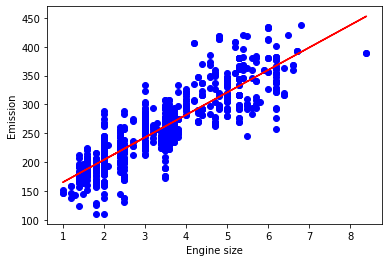

In [17]:
#print the fit line over the data

#print scatter graph of the data
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue') 

#print the fit line
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')

#data label
plt.xlabel("Engine size")
plt.ylabel("Emission")

# Evaluation of the model


In [18]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )


Mean absolute error: 22.57
Residual sum of squares (MSE): 825.85
R2-score: 0.69


# Multiple Regression Model

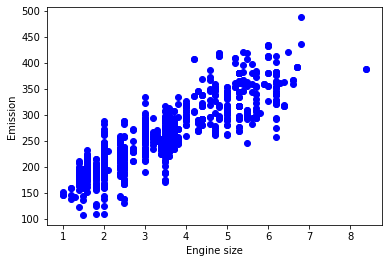

In [19]:
# import libraries
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

# import file
df = pd.read_csv("C:/Users/Gary Chu/Desktop\Data Science\FuelConsumptionCo2.csv")

# assign cdf as the file with only the data columns we need
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

# quick plotting of engine size vs emission
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

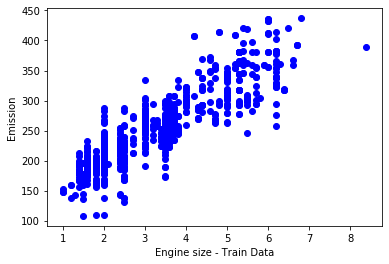

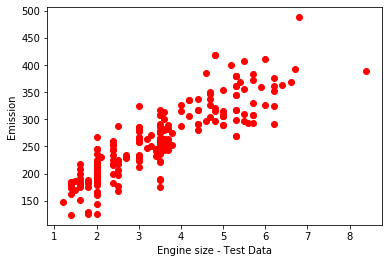

In [21]:
# assign random 80% of data for training and rest for testing
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

# show the train data distribution
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size - Train Data")
plt.ylabel("Emission")
plt.show()

# show the test data distribution
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS,  color='red')
plt.xlabel("Engine size - Test Data")
plt.ylabel("Emission")
plt.show()

In [22]:
# multiple regression model
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)


Coefficients:  [[11.51189158  7.39404295  9.1502681 ]]


Text(0, 0.5, 'Emission')

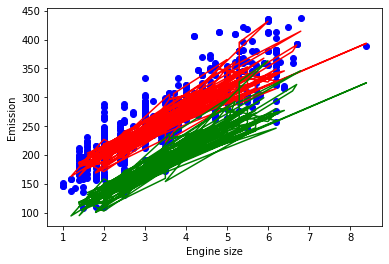

In [49]:

#print the fit line over the data
from sklearn.metrics import mean_absolute_error

#print scatter graph of the data
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue') 

x1 = test.ENGINESIZE
y1 = 11.5*test.ENGINESIZE + (7.394*test.CYLINDERS) + (9.15*test.FUELCONSUMPTION_COMB)

#calculate the bias coefficient
y0 = 11.5*train.ENGINESIZE + (7.394*train.CYLINDERS) + (9.15*train.FUELCONSUMPTION_COMB)
z1 = sum(abs(y0 - train.CO2EMISSIONS)) / len(train)

#print the fit line
plt.plot(x1,y1+z1, color = 'red')
#version 2
plt.plot(x1,y1, color = 'green')


#data label
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [23]:
# prediction
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 547.85
Variance score: 0.87


In [48]:
# use multiple linear regression with the same dataset but this time use 
# FUEL CONSUMPTION in CITY and FUEL CONSUMPTION in HWY instead of FUELCONSUMPTION_COMB. 
# Does it result in better accuracy?

# multiple regression model
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

# prediction
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))


Coefficients:  [[11.5355149   7.26860137  5.3530504   3.69193307]]
Residual sum of squares: 546.83
Variance score: 0.87
